In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [323]:
## Limpieza de datos

In [324]:
df_train = pd.read_csv("datos/train.csv")
df_train.keyword = df_train["keyword"].fillna("N/A")
df_train.location = df_train["location"].fillna("N/A")
df_train.text = df_train["text"].fillna("N/A")

In [325]:
print("Valores nulos sobre la columna Keyword sobre total ", str(len(df_train[df_train.keyword == "N/A"])), " / ", str(len(df_train)))
print("Valores nulos sobre la columna Location sobre total ", str(len(df_train[df_train.location == "N/A"])), " / ", str(len(df_train)))
print("Valores nulos sobre la columna Text sobre total ", str(len(df_train[df_train.text == "N/A"])), " / ", str(len(df_train)))

Valores nulos sobre la columna Keyword sobre total  61  /  7613
Valores nulos sobre la columna Location sobre total  2533  /  7613
Valores nulos sobre la columna Text sobre total  0  /  7613


In [326]:
## Localizados VS Sin Localizar

In [327]:
total_registros = len(df_train)
localizados = df_train[(df_train['location'] != 'N/A')] 
n_localizados = len(localizados['location'])

sin_localizar = df_train[(df_train['location'] == 'N/A')]
n_sin_localizar = len(sin_localizar['location'])

print("Cantidad de registros localizados: ",n_localizados)
print("Cantidad de registros sin localizar: ",n_sin_localizar)
print("Todal de registros : ",total_registros)

Cantidad de registros localizados:  5080
Cantidad de registros sin localizar:  2533
Todal de registros :  7613


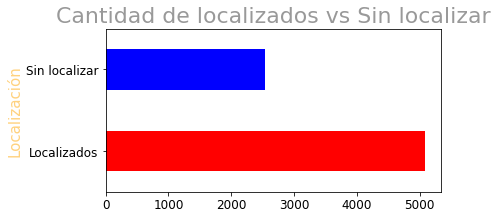

In [328]:
#Devuelvo item dependiendo si esta localizado o no

def esta_en_av(string):
    if string=='N/A':
        return 'Sin localizar'
    else :
        return 'Localizados'

#mapeo el set en una columna con los resultados de acuerdo a la funcion anterior
data = df_train['location'].map(esta_en_av)

#defino los colores que quiero especificamente
colors = ['red' if (x == max(data.value_counts())) else 'blue' for x in data.value_counts()]

#Grafico una función de barras para comparar resultados
g = data.value_counts().plot(kind='barh', y='cantidad', figsize=(6,3), fontsize=12, legend=False, alpha = 1, color = colors)
g.set_title("Cantidad de localizados vs Sin localizar", fontsize=22, color = 'black',alpha = 0.4)
g.set_ylabel("Localización", fontsize=15, color = 'orange', alpha = 0.5)
plt.show()


In [329]:
#Arrays copiados de la web
list_norteamerica = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States of America']

list_sudamerica = ['Argentina', 'Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']

list_africa = ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon','Central African Republic','Chad','Comoros','Democratic Republic of the Congo','Republic of the Congo','Cote d\'Ivoire','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe']

list_europa = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine','United Kingdom','Vatican City']

list_asia = ['Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei', 'Cambodia','China','Cyprus','Georgia','India','Indonesia','Iran','Iraq','Israel', 'Japan','Jordan','Kazakhstan','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Oman','Pakistan','Palestine','Philippines','Qatar','Russia','Saudi Arabia','Singapore','South Korea','Sri Lanka','Syria','Taiwan','Tajikistan','Thailand','Timor Leste','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen']

#funciones para determinar Continentes
def esta_en_lista(a,lista):
    for w in lista:
        if w == a:
            return True
           
    

def esta_en_map(string):
    listaPalabras = string.split()
    frecuenciaPalab = []
    for w in listaPalabras:
       if esta_en_lista(w,list_norteamerica):
            return 'Norteamerica'
       if esta_en_lista(w,list_sudamerica):
            return 'Sudamerica'
       if esta_en_lista(w,list_africa):
            return 'Africa'
       if esta_en_lista(w,list_europa):
            return 'Europa'
       if esta_en_lista(w,list_asia):
            return 'Asia'
    return 'NO'

#funcion para devolver Paises
def devuelve_pais(a,lista):
    for w in lista:
        if w == a:
            return w

def esta_pais(string, default='N/A'):
    listaPalabras = string.split()
    frecuenciaPalab = []
    for w in listaPalabras:
       if esta_en_lista(w,list_norteamerica):
            return devuelve_pais(w,list_norteamerica)
       if esta_en_lista(w,list_sudamerica):
            return devuelve_pais(w,list_norteamerica)
       if esta_en_lista(w,list_africa):
            return devuelve_pais(w,list_norteamerica)
       if esta_en_lista(w,list_europa):
            return devuelve_pais(w,list_norteamerica)
       if esta_en_lista(w,list_asia):
            return devuelve_pais(w,list_norteamerica)
    return default

In [330]:
#Agrego la longitud de los textos de los twts
df_train['long_text'] = df_train['text'].map(lambda x: len(x))
#Agrego columna de paises mencionados en el texto
df_train['pais_mencionado'] = df_train['text'].map(lambda x: esta_pais(x))
#Coincide localizacion con pais mencionado?
df_train['Continente'] = df_train['text'].map(lambda x: esta_en_map(x))

In [331]:
## Registros de paises localizados

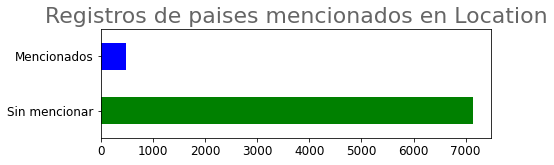

In [332]:
#mapeo el set en una columna con los resultados de acuerdo a la funcion anterior
df_train['Continente_loc'] = df_train['location'].map(lambda x: esta_en_map(x))

#mapeo segun sea mencionado un país o no en su locación
data = df_train['Continente_loc'].map(lambda x: 'Mencionados' if x != 'NO' else 'Sin mencionar')

#defino los colores
colors = ['green','blue']

#Grafico
g = data.value_counts().plot(kind='barh', y='cantidad', figsize=(7,2), fontsize=12, legend=False,color = colors)
g.set_title("Registros de paises mencionados en Location", fontsize=22, color = 'black',alpha = 0.6)
plt.show()


In [333]:
## Paises Localizados

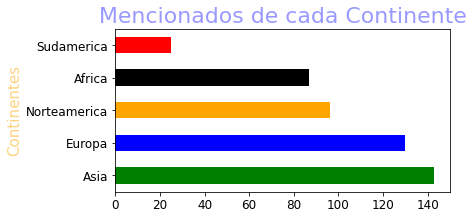

In [334]:

data = df_train[(df_train['Continente_loc'] != 'NO')]

#defino los colores
colors = ['green','blue','orange','black','red']

#Grafico de paises LOcalizados
g = data['Continente_loc'].value_counts().plot(kind='barh', y='cantidad', figsize=(6,3), fontsize=12, legend=False, alpha = 1, color = colors)
g.set_title("Mencionados de cada Continente", fontsize=22, color = 'blue',alpha = 0.4)
g.set_ylabel("Continentes", fontsize=15, color = 'orange', alpha = 0.5)
plt.show()

In [335]:
df_train.head()

id keyword location                                               text  \
0   1     N/A      N/A  Our Deeds are the Reason of this #earthquake M...   
1   4     N/A      N/A             Forest fire near La Ronge Sask. Canada   
2   5     N/A      N/A  All residents asked to 'shelter in place' are ...   
3   6     N/A      N/A  13,000 people receive #wildfires evacuation or...   
4   7     N/A      N/A  Just got sent this photo from Ruby #Alaska as ...   

   target  long_text pais_mencionado    Continente Continente_loc  
0       1         69             N/A            NO             NO  
1       1         38          Canada  Norteamerica             NO  
2       1        133             N/A            NO             NO  
3       1         65             N/A            NO             NO  
4       1         88             N/A            NO             NO

In [336]:
##MAPA DE MENCIONES POR CONTINENTES

In [337]:
table_continent = df_train.groupby('Continente')\
    .agg({'Continente':['count']})

In [338]:
table_continent 

Continente
                  count
Continente             
Africa               38
Asia                208
Europa               68
NO                 7272
Norteamerica         12
Sudamerica           15

In [339]:
dat = table_continent['Continente'].reset_index()
dat = dat.drop(dat[dat['Continente']=='NO'].index)
dat['lat'] =[20, 80, 5, -100, -60]
dat['lon'] =[0, 45, 45, 35, -15]
dat

Continente  count  lat  lon
0        Africa     38   20    0
1          Asia    208   80   45
2        Europa     68    5   45
4  Norteamerica     12 -100   35
5    Sudamerica     15  -60  -15

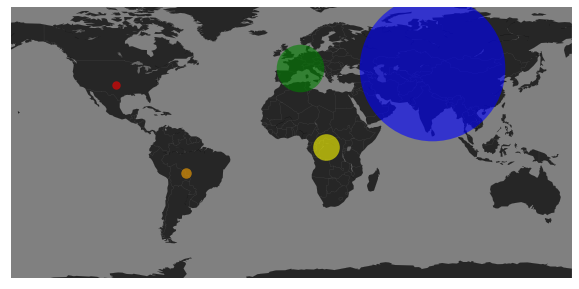

In [340]:

#Creo el mapa
figu, ax = plt.subplots(figsize=(15,5))
m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
m.drawmapboundary(fill_color='grey', linewidth=0)
m.fillcontinents(color='black', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="black")
m.drawcountries(linewidth=0.1, color='grey')
#m.drawlsmask(land_color=(0, 0, 0, 0), ocean_color='black', lakes=True, alpha=0.7)

# Añado un marcador en el mapa para cada continente
m.plot(dat['lat'][0], dat['lon'][0], linestyle='none', marker="o", markersize=dat['count'][0]*0.7, alpha=0.6, c="yellow", markeredgecolor="black", markeredgewidth=0)
m.plot(dat['lat'][1], dat['lon'][1], linestyle='none', marker="o", markersize=dat['count'][1]*0.7, alpha=0.6, c="blue", markeredgecolor="black", markeredgewidth=0)
m.plot(dat['lat'][2], dat['lon'][2], linestyle='none', marker="o", markersize=dat['count'][2]*0.7, alpha=0.6, c="green", markeredgecolor="black", markeredgewidth=0)
m.plot(dat['lat'][4], dat['lon'][4], linestyle='none', marker="o", markersize=dat['count'][4]*0.7, alpha=0.6, c="red", markeredgecolor="black", markeredgewidth=0)
m.plot(dat['lat'][5], dat['lon'][5], linestyle='none', marker="o", markersize=dat['count'][5]*0.7, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=0)

In [341]:
## Relacion entre text y target

In [ ]:
##CONSIGNA
#Sobre el set de datos del TP, analizar la relación que existe entre la longitud de los tweets, y la veracidad de los mismos. Para esto se espera que analicen las longitudes de los distintos tweets, long máxima, mínima, promedio, y si existe alguna relación entre estos valores y el target (que indica si la información provista en el tweet es real o no).
#Realizar una visualización que permita comunicar los resultados del punto 1.


In [342]:
longitud_maxima = max(df_train['long_text'])
longitud_minima = min(df_train['long_text'])
longitud_promedio = df_train['long_text'].mean()

print("La longitud máxima de un twwet tiene:", longitud_maxima)
print("La longitud mínima de un twwet tiene:", longitud_minima)
print("La longitud promedio entonces es:", longitud_promedio)

La longitud máxima de un twwet tiene: 157
La longitud mínima de un twwet tiene: 7
La longitud promedio entonces es: 101.1616970970708


In [343]:
table = df_train.groupby('target')\
    .agg({'long_text':['mean','sum','max','min','count', 'std']}) 

In [344]:
table.stack()

long_text
target                     
0      mean       95.832105
       sum    416103.000000
       max       157.000000
       min         7.000000
       count    4342.000000
       std        35.969652
1      mean      108.236319
       sum    354041.000000
       max       151.000000
       min        14.000000
       count    3271.000000
       std        29.369513

In [345]:
dat = table['long_text'].reset_index()

In [346]:
dat

target        mean     sum  max  min  count        std
0       0   95.832105  416103  157    7   4342  35.969652
1       1  108.236319  354041  151   14   3271  29.369513

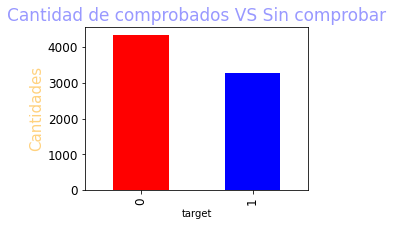

In [347]:
#Cantidad de comprobados VS Sin comprobar
colors = ['red','blue']
v = dat.plot(kind='bar', x='target', y='count', figsize=(4,3), fontsize=12, legend=False, alpha = 1, color = colors)
v.set_title("Cantidad de comprobados VS Sin comprobar", fontsize=17, color = 'blue',alpha = 0.4)
v.set_ylabel("Cantidades", fontsize=15, color = 'orange', alpha = 0.5)
plt.show()

In [ ]:
## BOXPLOT - Comparo las variaciones con respecto a la media

Text(0.5, 0, 'Targets')

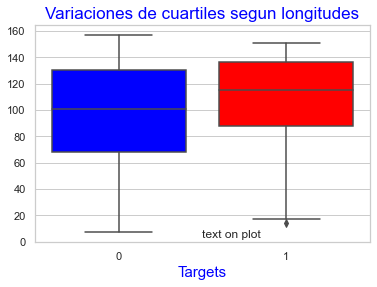

In [456]:
#Preparo los datos para graficar con boxplot de seaborn
data_1  = (df_train[df_train['target'] == 0]).reset_index()\
                .drop(['index'],axis=1)
data_2  = (df_train[df_train['target'] == 1]).reset_index()\
                .drop(['index'],axis=1)

datos_graf = [data_1['long_text'], data_2['long_text']]
plt.figure(figsize = (6, 4))
x_pos = 0.5
y_pos = 3

#Paleta de colores
colors = ['blue', 'red']

#Agrego textos adicionales para detallar el plot
#plt.text(x_pos, y_pos, "text on plot")
v = sns.boxplot(data=datos_graf, saturation=1, palette = colors)
v.set_title("Variaciones de cuartiles segun longitudes", fontsize=17, color = 'blue',alpha = 1)
v.set_xlabel("Targets", fontsize=15, color = 'blue', alpha = 1) 

In [ ]:
## Swarmplot - Comparo como se dispersan los valores y sus valores atípicos

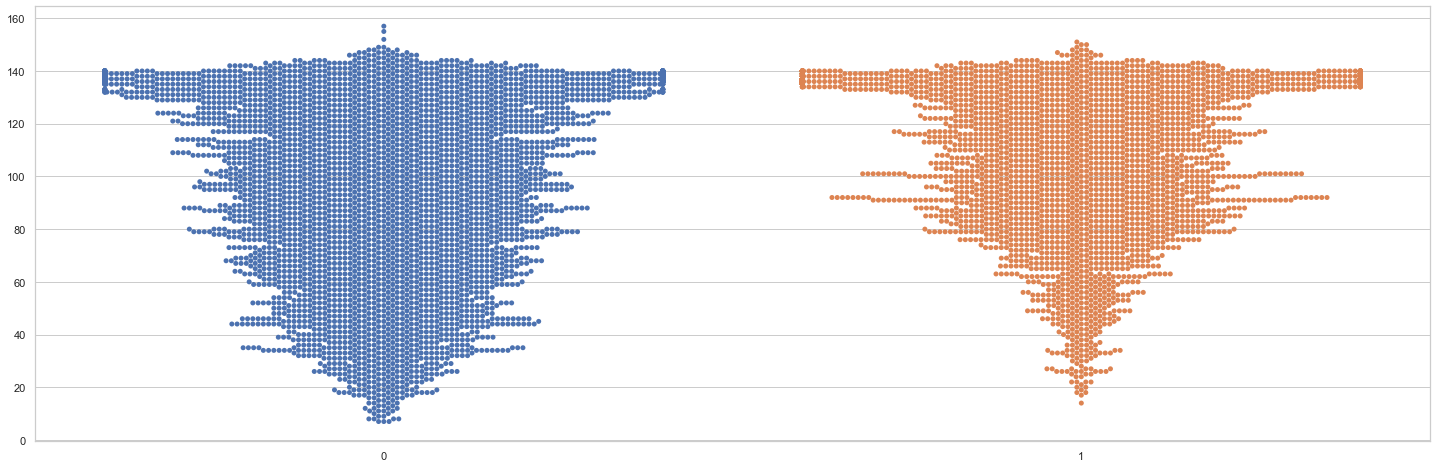

In [439]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize = (25, 8))
ax = sns.swarmplot(data=datos_graf)

In [ ]:
## Combinacion Swarmplot y Boxplot

Text(0.5, 0, 'Targets')

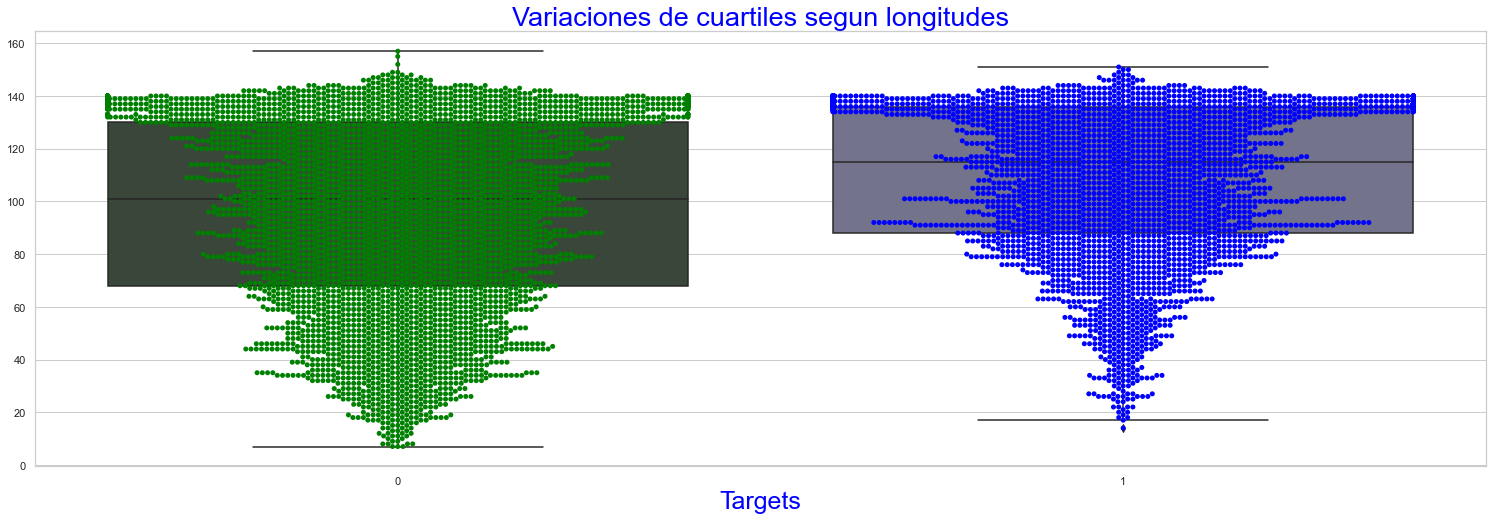

In [462]:
#Combino los dos graficos anteriores
plt.figure(figsize = (26, 8))
x_pos = 0.5
y_pos = 3
colors = ['green', 'blue']
#Agrego textos adicionales para detallar el plot
#plt.text(x_pos, y_pos, "text on plot")

v = sns.boxplot(data=datos_graf, saturation=0.1, palette = colors)
v = sns.swarmplot(data=datos_graf, palette = colors)
v.set_title("Variaciones de cuartiles segun longitudes", fontsize=27, color = 'blue',alpha = 1)
v.set_xlabel("Targets", fontsize=25, color = 'blue', alpha = 1) 

#Guardar archivo png
#plt.savefig("out.png")

In [ ]:
#Conclusiones:
    